In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('Crop_yield1.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909


In [60]:
south_indian_states={'Kerala','Tamil Nadu','Karnataka','Andhra Pradesh','Telengana','Puducherry'}
df2=df[df['State'].isin(south_indian_states)]
df2.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
27,Arecanut,1997,Whole Year,Karnataka,93100.0,133342.0,1266.7,8860327.00,28861.00,1.293571
28,Arhar/Tur,1997,Kharif,Karnataka,421810.0,98473.0,1266.7,40143657.70,130761.10,0.268235
29,Bajra,1997,Kharif,Karnataka,301149.0,132056.0,1266.7,28660350.33,93356.19,0.404545
30,Bajra,1997,Summer,Karnataka,820.0,662.0,1266.7,78039.40,254.20,0.810000
31,Black pepper,1997,Kharif,Karnataka,3825.0,924.0,1266.7,364025.25,1185.75,0.437500


In [61]:
df2.isnull().sum()

Crop                0
Crop_Year           0
Season              0
State               0
Area                0
Production         28
Annual_Rainfall     6
Fertilizer          0
Pesticide           0
Yield              43
dtype: int64

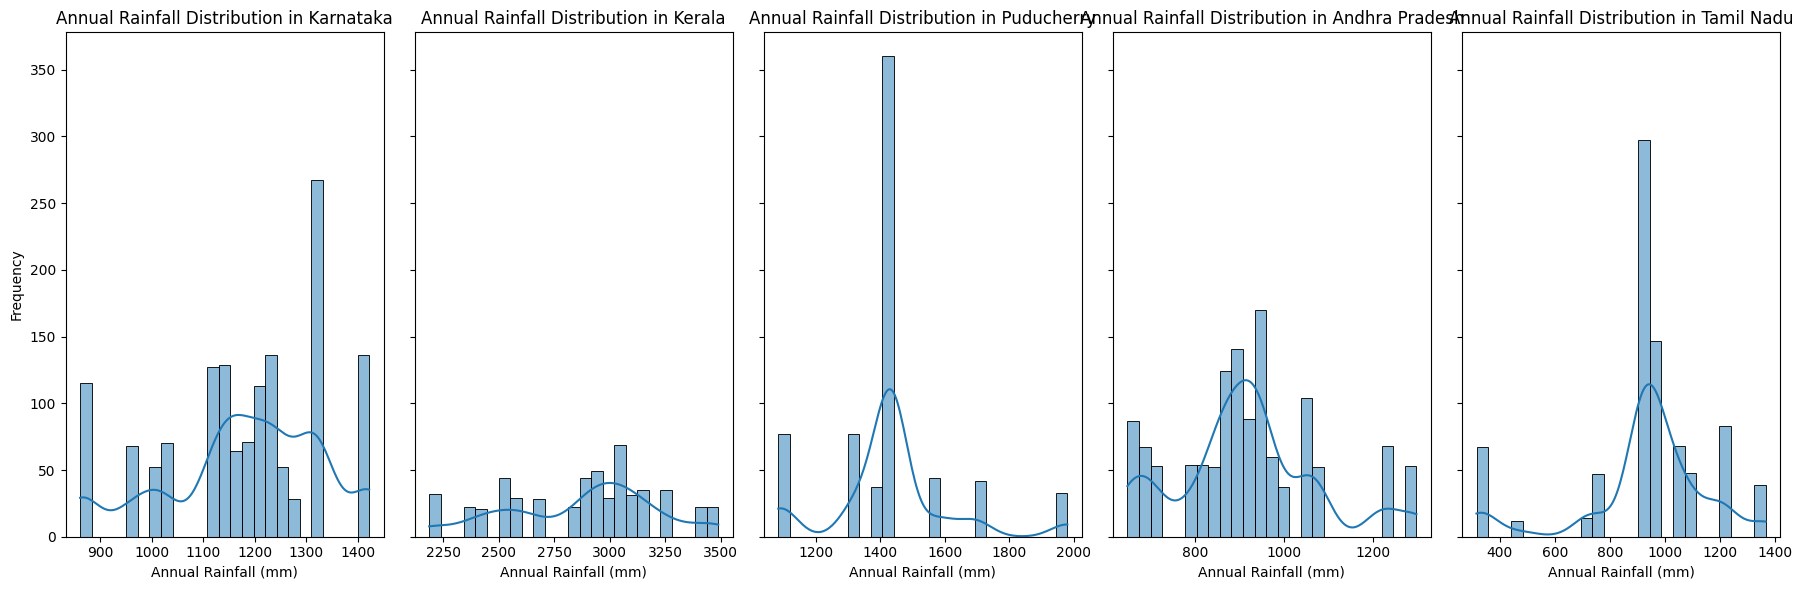

In [62]:
#checking for distribution
states=df2['State'].unique()

# Create a dictionary to store the data for each state
rainfall_data = {}

# Loop through each state and filter the data
for state in states:
    rainfall_data[state] = df2[df2['State'] == state]['Annual_Rainfall']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(states), figsize=(18, 6), sharey=True)

# Plot histograms for each state's data
for ax, state in zip(axes, states):
    sns.histplot(rainfall_data[state], kde=True, bins=25, ax=ax)
    ax.set_title(f'Annual Rainfall Distribution in {state}')
    ax.set_xlabel('Annual Rainfall (mm)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [63]:
# Filter the dataframe for rows where Annual_Rainfall is null
null_rainfall = df[df['Annual_Rainfall'].isnull()]

# Select the columns Crop_Year, State, and Season
null_rainfall_info = null_rainfall[['Crop_Year', 'State', 'Season']]

# Print the filtered information
print(null_rainfall_info)

      Crop_Year           State       Season
55         1997       Karnataka  Whole Year 
56         1997       Karnataka  Rabi       
190        1998       Karnataka  Rabi       
191        1998       Karnataka  Summer     
1035       2002  Andhra Pradesh  Rabi       
1036       2002  Andhra Pradesh  Rabi       


In [64]:
#Filling the null values using the forward filling method
df2.loc[:,'Annual_Rainfall']=df2['Annual_Rainfall'].ffill()

In [65]:
#filled null values with 0
df2.loc[:,'Production']=df2['Production'].fillna(0)
df2.loc[:,'Yield']=df2['Yield'].fillna(0)

In [66]:
#Checking for null values in all the columns
df2.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

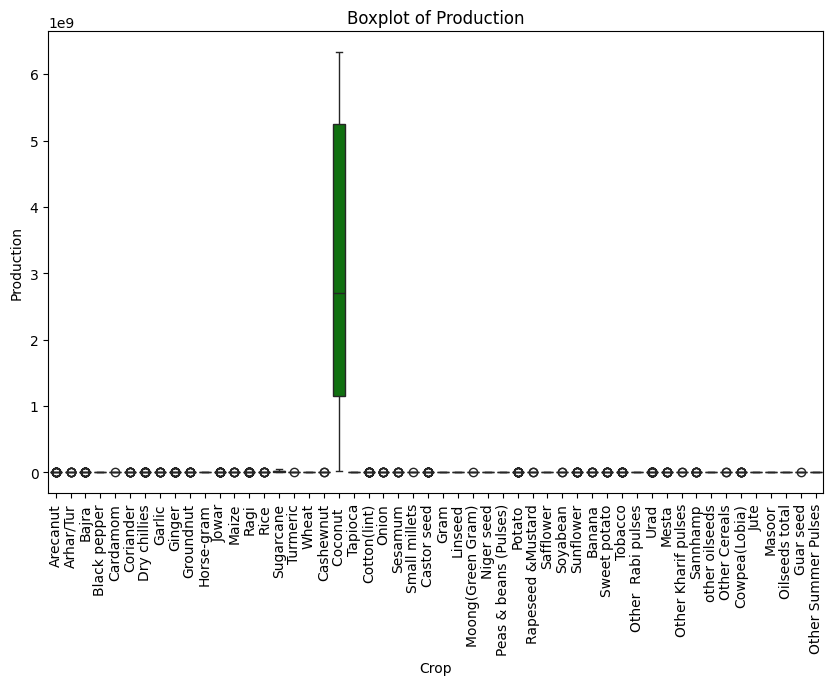

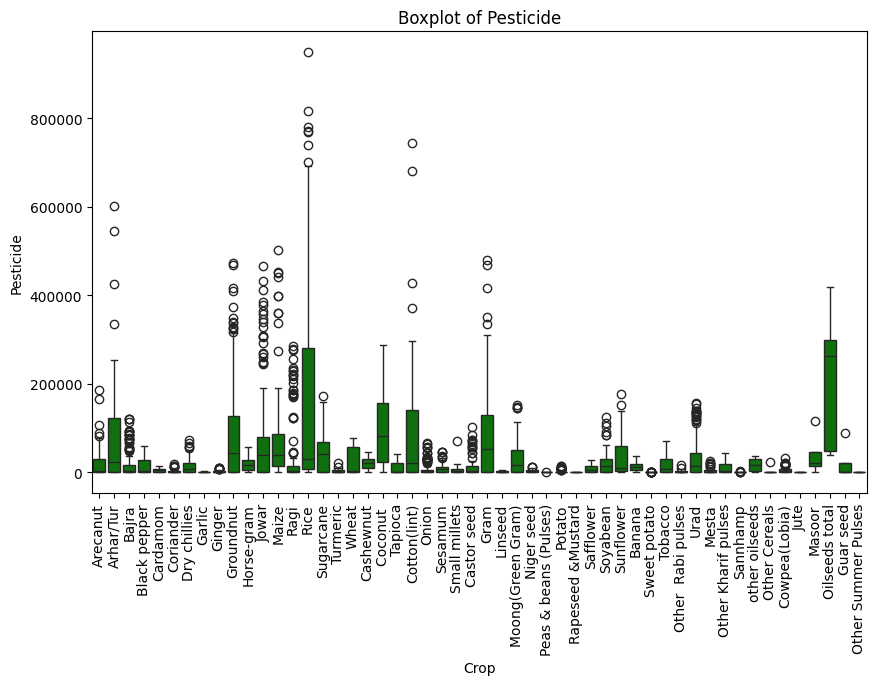

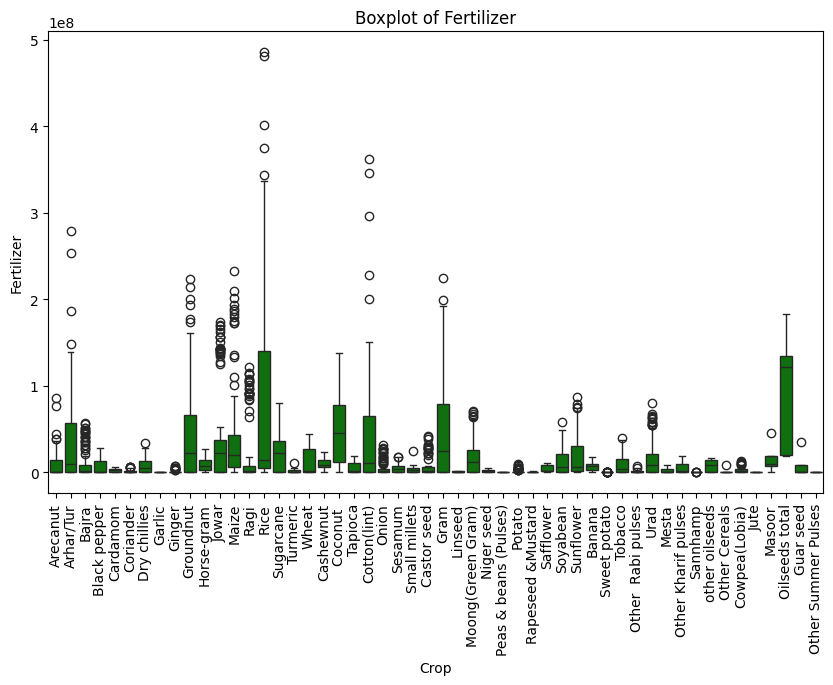

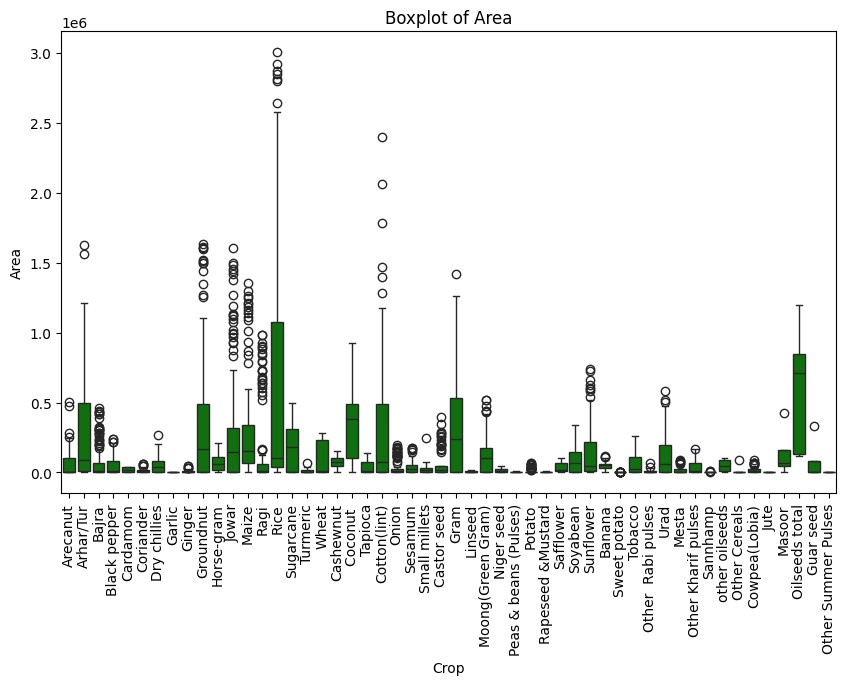

In [67]:
# Loop through each numeric column and create a boxplot
for column in numeric_columns:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.boxplot(x='Crop', y=column, data=df2,color='green')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [68]:
# AREA OUTLIERS
#Checking for outlier values whether it need to be clipped or not. Finding genuine outliers and pecentage of outliers.
def find_outliers(group):
    q1 = group['Area'].quantile(0.25)
    q3 = group['Area'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Area'] < lower_bound) | (group['Area'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
#print(outliers)
outliers
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 5.50%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2016,Whole Year,Karnataka,254640.0,2586795.0,1147.2,3.902358e+07,89124.00,10.121818
1,Arecanut,2017,Whole Year,Karnataka,279459.0,3030925.0,1111.7,4.399802e+07,106194.42,10.920000
2,Arecanut,2018,Whole Year,Karnataka,476378.0,4253453.0,1419.1,7.726851e+07,166732.30,9.040000
3,Arecanut,2019,Whole Year,Karnataka,500522.0,5409381.0,1422.3,8.596966e+07,185193.14,10.772400
4,Arhar/Tur,2018,Kharif,Karnataka,1560680.0,945939.0,1419.1,2.531423e+08,546238.00,0.552500
...,...,...,...,...,...,...,...,...,...,...
255,Sweet potato,2002,Whole Year,Karnataka,3390.0,26917.0,860.8,3.209313e+05,847.50,6.286000
256,Turmeric,2011,Whole Year,Tamil Nadu,67246.0,368413.0,926.5,1.126505e+07,22191.18,5.563793
257,Urad,2001,Rabi,Andhra Pradesh,519831.0,338499.0,928.4,5.309034e+07,135156.06,0.439545
258,Urad,2002,Rabi,Andhra Pradesh,584271.0,330894.0,648.1,5.531294e+07,146067.75,0.386667


In [69]:
#FERTILIZER outliers
def find_outliers(group):
    q1 = group['Fertilizer'].quantile(0.25)
    q3 = group['Fertilizer'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Fertilizer'] < lower_bound) | (group['Fertilizer'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
#print(outliers)
outliers
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 5.23%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2015,Whole Year,Karnataka,247927.0,2430194.0,1024.9,39150152.57,81815.91,10.210476
1,Arecanut,2016,Whole Year,Karnataka,254640.0,2586795.0,1147.2,39023580.00,89124.00,10.121818
2,Arecanut,2017,Whole Year,Karnataka,279459.0,3030925.0,1111.7,43998024.96,106194.42,10.920000
3,Arecanut,2018,Whole Year,Karnataka,476378.0,4253453.0,1419.1,77268511.60,166732.30,9.040000
4,Arecanut,2019,Whole Year,Karnataka,500522.0,5409381.0,1422.3,85969658.72,185193.14,10.772400
...,...,...,...,...,...,...,...,...,...,...
242,Urad,2017,Rabi,Andhra Pradesh,357442.0,333413.0,868.2,56275668.48,135827.96,0.911538
243,Urad,2017,Rabi,Tamil Nadu,367910.0,248377.0,970.9,57923750.40,139805.80,0.679667
244,Urad,2018,Rabi,Tamil Nadu,396479.0,240497.0,986.2,64308893.80,138767.65,0.607000
245,Urad,2019,Rabi,Tamil Nadu,362726.0,281577.0,910.1,62301817.76,134208.62,0.759000


In [71]:
#PESTICIDE Outliers
def find_outliers(group):
    q1 = group['Pesticide'].quantile(0.25)
    q3 = group['Pesticide'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Pesticide'] < lower_bound) | (group['Pesticide'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 5.95%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,2015,Whole Year,Karnataka,247927.0,2430194.0,1024.9,39150152.57,81815.91,10.210476
1,Arecanut,2016,Whole Year,Karnataka,254640.0,2586795.0,1147.2,39023580.00,89124.00,10.121818
2,Arecanut,2017,Whole Year,Karnataka,279459.0,3030925.0,1111.7,43998024.96,106194.42,10.920000
3,Arecanut,2018,Whole Year,Karnataka,476378.0,4253453.0,1419.1,77268511.60,166732.30,9.040000
4,Arecanut,2019,Whole Year,Karnataka,500522.0,5409381.0,1422.3,85969658.72,185193.14,10.772400
...,...,...,...,...,...,...,...,...,...,...
276,Urad,2019,Rabi,Tamil Nadu,362726.0,281577.0,910.1,62301817.76,134208.62,0.759000
277,Urad,1997,Rabi,Andhra Pradesh,413000.0,190700.0,927.5,39305210.00,128030.00,0.388125
278,Urad,1998,Kharif,Tamil Nadu,446130.0,218245.0,1077.1,44077644.00,129377.70,0.505926
279,Urad,1999,Kharif,Tamil Nadu,439604.0,218071.0,922.8,46655172.52,118693.08,0.517778


In [72]:
#PRODUCTION Outliers
def find_outliers(group):
    q1 = group['Production'].quantile(0.25)
    q3 = group['Production'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Production'] < lower_bound) | (group['Production'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 6.27%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1998,Whole Year,Karnataka,98047.0,648365.0,1260.8,9687043.60,28433.63,6.232000
1,Arecanut,2005,Whole Year,Karnataka,161151.0,1033658.0,1316.2,19325227.92,33841.71,6.212381
2,Arecanut,2007,Whole Year,Karnataka,174404.0,1114484.0,1323.3,23265493.60,27904.64,6.211429
3,Arecanut,2008,Whole Year,Karnataka,184515.0,1174591.0,1164.1,26393025.60,16606.35,6.214286
4,Arecanut,2009,Whole Year,Karnataka,195802.0,1243385.0,1321.0,30509867.64,33286.34,6.210476
...,...,...,...,...,...,...,...,...,...,...
291,Urad,1999,Kharif,Tamil Nadu,439604.0,218071.0,922.8,46655172.52,118693.08,0.517778
292,Urad,2000,Kharif,Tamil Nadu,503982.0,244412.0,971.1,49475912.94,131035.32,0.517778
293,Urad,2004,Rabi,Andhra Pradesh,351048.0,223561.0,781.8,38032540.32,73720.08,0.608947
294,Urad,2007,Rabi,Andhra Pradesh,407000.0,201000.0,1004.2,54293800.00,65120.00,0.600000


In [74]:
#YIELD Outliers
def find_outliers(group):
    q1 = group['Yield'].quantile(0.25)
    q3 = group['Yield'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Yield'] < lower_bound) | (group['Yield'] > upper_bound)]
    return outliers

outliers = df2.groupby('Crop').apply(find_outliers).reset_index(drop=True)
total_data_points = df2.shape[0]
number_of_outliers = outliers.shape[0]
percentage_of_outliers = (number_of_outliers / total_data_points) * 100

print(f"Percentage of outliers: {percentage_of_outliers:.2f}%")
outliers

Percentage of outliers: 4.23%


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1998,Whole Year,Karnataka,98047.0,648365.0,1260.8,9687043.60,28433.63,6.232000
1,Arecanut,2005,Whole Year,Karnataka,161151.0,1033658.0,1316.2,19325227.92,33841.71,6.212381
2,Arecanut,2007,Whole Year,Karnataka,174404.0,1114484.0,1323.3,23265493.60,27904.64,6.211429
3,Arecanut,2008,Whole Year,Karnataka,184515.0,1174591.0,1164.1,26393025.60,16606.35,6.214286
4,Arecanut,2009,Whole Year,Karnataka,195802.0,1243385.0,1321.0,30509867.64,33286.34,6.210476
...,...,...,...,...,...,...,...,...,...,...
195,Wheat,2012,Whole Year,Kerala,1.0,0.0,2187.6,150.80,0.31,0.000000
196,Wheat,2014,Whole Year,Kerala,1.0,3.0,3046.4,150.96,0.33,3.000000
197,Wheat,2016,Rabi,Andhra Pradesh,33.0,76.0,890.0,5057.25,11.55,2.155000
198,Wheat,2018,Rabi,Andhra Pradesh,102.0,19.0,1220.5,16544.40,35.70,0.095000


As per our research we found that the shown outliers could be genuine values. Therefore we are currently decided not to clip the values.
When Not to Clip Outliers

 1.Natural Variability: If outliers are natural variations in the data (e.g., rare but valid events), they should be kept to maintain the integrity of the dataset.
2. Small Sample Sizes: Removing outliers in small datasets can result in loss of
valuable information and lead to misleading conclusions.
3.Specific Analysis: For certain types of analysis, such as anomaly detection,
outliers are the primary focus and should not be removed.